# Download

## Variables

### Query

Before you run the program, you can change the variables - the cloud coverage percentage range, coordinates of the area (we recommend [boundingbox](https://boundingbox.klokantech.com/) - CSV RAW) and the time period in which the satellite image was taken.

Make sure you typed the variable values correctly. Be aware that too high or too low cloud coverage value, too short a time period or too small area may result in no image being found.

In [22]:
cloud_coverage_range = (0, 20)
coordinates = [20.860291,53.633239,22.118225,54.059388]

In [23]:
from datetime import date
time_peroid_start = date(2021, 7, 1)
time_peroid_end = date(2021, 7, 31)

### Preview images

Specify if you want to download and display all images that match the query. If you are running the script for the first time, we recommend setting both variables to true, otherwise you can skip this by setting both variables to false.

In [24]:
download_all = True
show_all = True

### Specific image

If you do not need to download specific image and show its filepath, set variable to -1, otherwise change ```specific_image_index``` value to the index of the photo you are interested in (we recommend the one that contains as few clouds as possible).

In [25]:
specific_image_index = 4

## Actual program

### Products avaliable

Be aware that too high or too low cloud coverage value, too short a time period or too small area may result in no image being found.

In [26]:
from sentinelsat import SentinelAPI, make_path_filter
from datetime import date

api = SentinelAPI(None, None)

def getQuery(down_left, top_right, start_date, end_date):
    footprint = "POLYGON(("
    footprint += down_left[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + down_left[1]
    footprint += "))"

    return api.query(footprint,
                    date=(start_date, end_date),
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    cloudcoverpercentage=cloud_coverage_range)

products = getQuery((str(coordinates[0]), str(coordinates[1])), (str(coordinates[2]), str(coordinates[3])), time_peroid_start, time_peroid_end)

products_df = api.to_dataframe(products)
products_df

title  \
a3c52152-e6df-4be5-b377-08d9b4a220aa  S2A_MSIL2A_20210726T095031_N0301_R079_T34UEF_2...   
941b751f-35cb-4423-bbff-6e4d79b5cf5f  S2A_MSIL2A_20210723T094031_N0301_R036_T34UDF_2...   
0aa324ae-840d-4adb-a4ae-6ff89d7e7e1c  S2B_MSIL2A_20210718T094039_N0301_R036_T34UEF_2...   
b8976c27-0750-43e4-b006-375fe37e4b09  S2A_MSIL2A_20210716T095031_N0301_R079_T34UDF_2...   
ad507e30-1054-44ca-8fe9-532ecc088389  S2A_MSIL2A_20210716T095031_N0301_R079_T34UEF_2...   
5d272f3b-87de-47be-b58f-151a684334f6  S2A_MSIL2A_20210713T094031_N0301_R036_T34UDF_2...   
fc367ce2-a6b4-494d-b31e-b2a1f4f7409b  S2A_MSIL2A_20210713T094031_N0301_R036_T34UEE_2...   
e778b890-cb75-439e-82f8-b8d805dc91c2  S2A_MSIL2A_20210713T094031_N0301_R036_T34UEF_2...   
e8234562-7443-4c7b-b53c-4dac54c0076e  S2B_MSIL2A_20210711T095029_N0301_R079_T34UEE_2...   
10b076c7-e5b3-467b-8d30-ec8f133514f6  S2B_MSIL2A_20210711T095029_N0301_R079_T34UDF_2...   
2696e9d2-d738-4a9f-9960-daf0635465d4  S2A_MSIL2A_20210706T095031_N0301_R079_T34UEE_2...   
2e362121-cc7b-46e4-8b79-5b11b8dee389  S2A_MSIL2A_20210706T095031_N0301_R079_T34UDE_2...   
5f34b913-01c2-4216-ab64-5539dde551d0  S2A_MSIL2A_20210706T095031_N0301_R079_T34UDF_2...   
a421c1ad-5a78-4613-954d-76c16a053c99  S2A_MSIL2A_20210706T095031_N0301_R079_T34UEF_2...   
c904fbf0-f53d-48ab-a0af-85fbb102adbf  S2B_MSIL2A_20210701T095029_N0301_R079_T34UDF_2...   
6d7e5978-b7a8-4299-a13e-d5eb8dd64739  S2B_MSIL2A_20210701T095029_N0301_R079_T34UEF_2...   
85b112de-36f6-4e8f-a2f3-f35485bc5f3d  S2B_MSIL2A_20210701T095029_N0301_R079_T34UDE_2...   

                                                                                   link  \
a3c52152-e6df-4be5-b377-08d9b4a220aa  https://apihub.copernicus.eu/apihub/odata/v1/P...   
941b751f-35cb-4423-bbff-6e4d79b5cf5f  https://apihub.copernicus.eu/apihub/odata/v1/P...   
0aa324ae-840d-4adb-a4ae-6ff89d7e7e1c  https://apihub.copernicus.eu/apihub/odata/v1/P...   
b8976c27-0750-43e4-b006-375fe37e4b09  https://apihub.copernicus.eu/apihub/odata/v1/P...   
ad507e30-1054-44ca-8fe9-532ecc088389  https://apihub.copernicus.eu/apihub/odata/v1/P...   
5d272f3b-87de-47be-b58f-151a684334f6  https://apihub.copernicus.eu/apihub/odata/v1/P...   
fc367ce2-a6b4-494d-b31e-b2a1f4f7409b  https://apihub.copernicus.eu/apihub/odata/v1/P...   
e778b890-cb75-439e-82f8-b8d805dc91c2  https://apihub.copernicus.eu/apihub/odata/v1/P...   
e8234562-7443-4c7b-b53c-4dac54c0076e  https://apihub.copernicus.eu/apihub/odata/v1/P...   
10b076c7-e5b3-467b-8d30-ec8f133514f6  https://apihub.copernicus.eu/apihub/odata/v1/P...   
2696e9d2-d738-4a9f-9960-daf0635465d4  https://apihub.copernicus.eu/apihub/odata/v1/P...   
2e362121-cc7b-46e4-8b79-5b11b8dee389  https://apihub.copernicus.eu/apihub/odata/v1/P...   
5f34b913-01c2-4216-ab64-5539dde551d0  https://apihub.copernicus.eu/apihub/odata/v1/P...   
a421c1ad-5a78-4613-954d-76c16a053c99  https://apihub.copernicus.eu/apihub/odata/v1/P...   
c904fbf0-f53d-48ab-a0af-85fbb102adbf  https://apihub.copernicus.eu/apihub/odata/v1/P...   
6d7e5978-b7a8-4299-a13e-d5eb8dd64739  https://apihub.copernicus.eu/apihub/odata/v1/P...   
85b112de-36f6-4e8f-a2f3-f35485bc5f3d  https://apihub.copernicus.eu/apihub/odata/v1/P...   

                                                                       link_alternative  \
a3c52152-e6df-4be5-b377-08d9b4a220aa  https://apihub.copernicus.eu/apihub/odata/v1/P...   
941b751f-35cb-4423-bbff-6e4d79b5cf5f  https://apihub.copernicus.eu/apihub/odata/v1/P...   
0aa324ae-840d-4adb-a4ae-6ff89d7e7e1c  https://apihub.copernicus.eu/apihub/odata/v1/P...   
b8976c27-0750-43e4-b006-375fe37e4b09  https://apihub.copernicus.eu/apihub/odata/v1/P...   
ad507e30-1054-44ca-8fe9-532ecc088389  https://apihub.copernicus.eu/apihub/odata/v1/P...   
5d272f3b-87de-47be-b58f-151a684334f6  https://apihub.copernicus.eu/apihub/odata/v1/P...   
fc367ce2-a6b4-494d-b31e-b2a1f4f7409b  https://apihub.copernicus.eu/apihub/odata/v1/P...   
e778b890-cb75-439e-82f8-b8d805dc91c2  https://apihub.copernicus.eu/apihub/od

### Preview images download

Please remember that some photos may be offline and, therefore, downloading them at the time of launching the program may not be possible.

In [27]:
if (download_all):
    for product in products:
        try:
            api.download(product, nodefilter = make_path_filter("*B02_60m.jp2", exclude = False), directory_path='downloads')
            api.download(product, nodefilter = make_path_filter("*B03_60m.jp2", exclude = False), directory_path='downloads')
            api.download(product, nodefilter = make_path_filter("*B04_60m.jp2", exclude = False), directory_path='downloads')
        except Exception as e:
            print(e)
            continue

### Preview images show


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15: good


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16: good


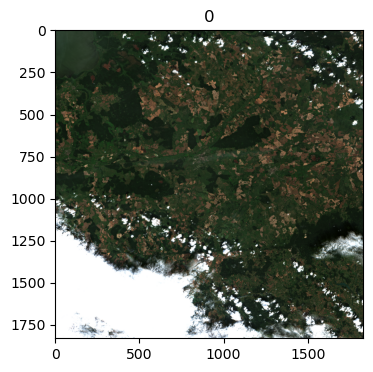

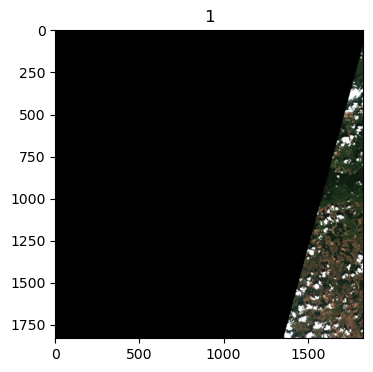

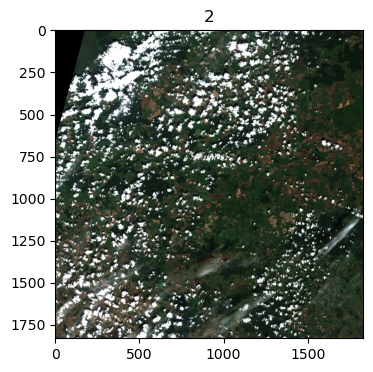

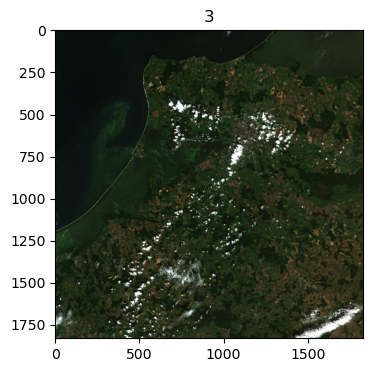

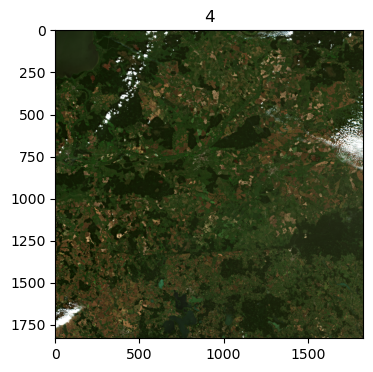

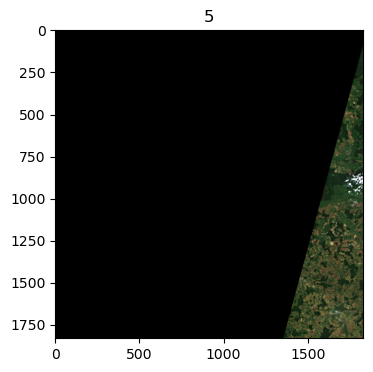

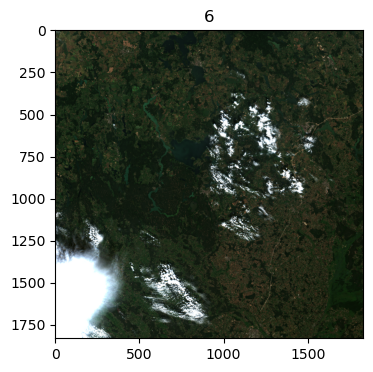

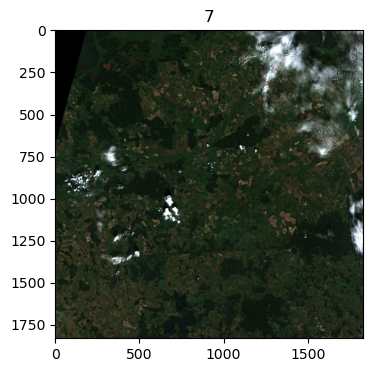

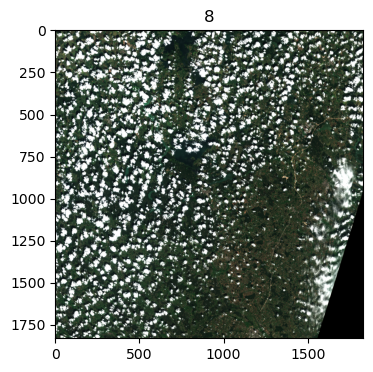

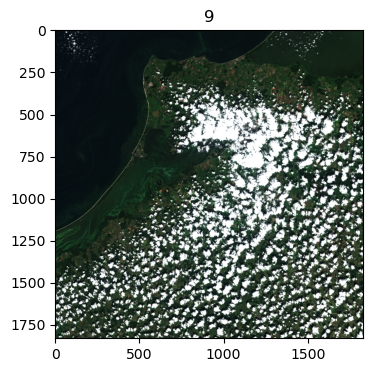

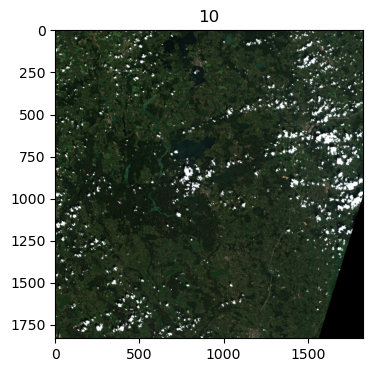

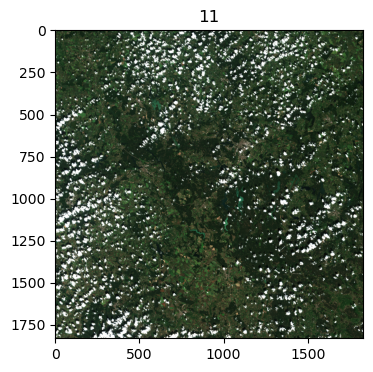

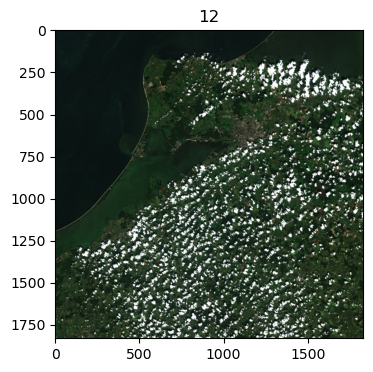

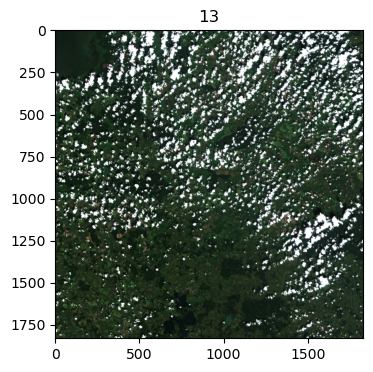

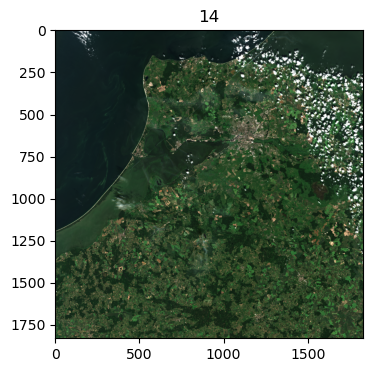

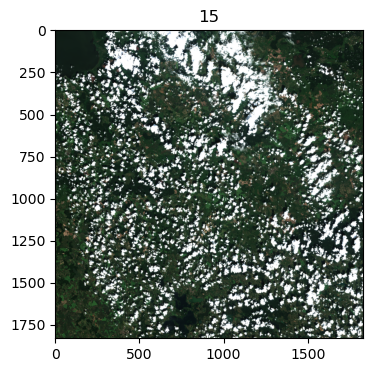

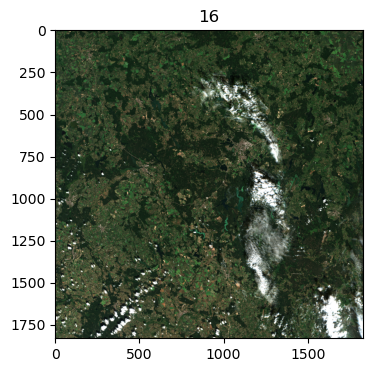

In [28]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def get_path(path_idx, scale='10'):
    path = 'downloads/'
    path += products_df.to_dict('split')['data'][path_idx][0] 
    path += '.SAFE/GRANULE/L2A_'
    path += products_df.to_dict('split')['data'][path_idx][0].split('_')[5]
    path += '_'
    path += products_df.to_dict('split')['data'][path_idx][22].split('_')[7]
    path += '_'
    path += products_df.to_dict('split')['data'][path_idx][38].split('_')[7][1:]
    path += '/IMG_DATA/R' + scale + 'm/'
    path += products_df.to_dict('split')['data'][path_idx][0].split('_')[5]
    path += '_'
    path += products_df.to_dict('split')['data'][path_idx][0].split('_')[2]
    return path

def load_sentinel_image(img_folder, filename, bands, scale):
    image = {}
    for band in bands:
        file = img_folder + 'R' + scale + 'm/' + filename + '_' + band + '_' + scale + 'm.jp2'
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

def display_rgb(img, b_r, b_g, b_b, alpha = 1., figsize = (10, 10), title=''):
    rgb = np.stack([img[b_r], img[b_g], img[b_b]], axis=-1)
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize = figsize)
    plt.title(title)
    plt.imshow(rgb)

def show_all_images():
    for i in range(len(products_df.to_dict('split')['data'])):
        try:
            filepath = get_path(i, '60')
            img = load_sentinel_image(filepath[:filepath.index("IMG_DATA") + 9], filepath[filepath.index("IMG_DATA") + 14:], ['B02', 'B03', 'B04'], '60')
            display_rgb(img, 'B04', 'B03', 'B02', alpha = 5., figsize = (4, 4), title = str(i))
            print(str(i) + ': good')
        except:
            print(str(i) + ': error')

if (show_all):
    show_all_images()

### Specific image download

filepath_10m = "downloads/S2A_MSIL2A_20210716T095031_N0301_R079_T34UEF_20210716T120258.SAFE/GRANULE/L2A_T34UEF_A031679_20210716T095359/IMG_DATA/R10m/T34UEF_20210716T095031"


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


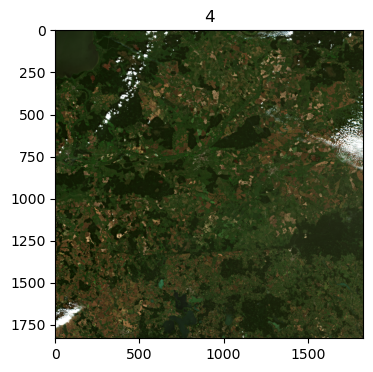

In [29]:
if (specific_image_index != -1):
    path_filter = make_path_filter('*B??_??m.jp2', exclude = False)
    api.download(products_df.to_dict('split')['data'][specific_image_index][41], directory_path='downloads', nodefilter = path_filter)

    print('filepath_10m = \"' + get_path(specific_image_index) + '\"')
    
    filepath = get_path(specific_image_index, '60')
    img = load_sentinel_image(filepath[:filepath.index("IMG_DATA") + 9], filepath[filepath.index("IMG_DATA") + 14:], ['B02', 'B03', 'B04'], '60')
    display_rgb(img, 'B04', 'B03', 'B02', alpha = 5., figsize = (4, 4), title = str(specific_image_index))